# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

#### Solution

To plot the point difference between Michigan Wolverines and rival teams in Men's basketball games across different years. The data has been picked from following source links:

https://en.wikipedia.org/wiki/Michigan%E2%80%93Michigan_State_men%27s_basketball_rivalry
https://en.wikipedia.org/wiki/Duke%E2%80%93Michigan_men%27s_basketball_rivalry

The graph serves to show how the point difference has varied over time across rival teams, indicating if it has remained constant, or has had high variance. 

It also shows a trend occurence in the point difference. The separating line passes through 0.Points above the separating line indicate that Michigan Wolverines have won the game, and below the line indicate that Michigan Wolverines have lost the game for that year. 

The plot is discontinuous in some instances, which informs the viewer that no match was played between the teams.

The graph has been plotted for a span of 50 years.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
umich_msu = pd.read_csv('Michigan_State.csv')
umich_duke = pd.read_csv('Michigan_Duke.csv')
umich_duke.rename(columns = {'Winning team': 'Winner'}, inplace = True)

In [3]:
def pass_dataframe(df):
    df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%B %d, %Y'))
    df['Year'] = df['Date'].apply(lambda x: x.year)
    df['Winner'] = df['Winner'].astype(str)
    return df

def compute_goal_diff(x):
    return ((x['Winning team.1'] - x['Losing team.1']) if (x['Winner'] == 'Michigan') else (x['Losing team.1'] - x['Winning team.1']))


In [4]:
umich_msu = pass_dataframe(umich_msu)
umich_duke = pass_dataframe(umich_duke)

umich_msu['Score'] = umich_msu['Score'].astype(str)
umich_msu['Winning team.1'] = umich_msu['Score'].apply(lambda y: int(y[:y.find('–')]))
umich_msu['Losing team.1']= umich_msu['Score'].apply(lambda y: int(y[(y.find('–')+1):]))
umich_msu['Goal difference'] = umich_msu.apply(lambda x: compute_goal_diff(x),axis=1)

umich_duke['Winner'] = umich_duke['Winner'].apply(lambda x: x.replace(' ',''))
umich_duke['Winner'] = umich_duke['Winner'].apply(lambda y: y[:y.find('(')])
umich_duke['Goal difference'] = umich_duke.apply(lambda x: compute_goal_diff(x),axis=1)

In [5]:
umich_duke_grouped = umich_duke.groupby(['Year']).agg({'Goal difference': np.mean}).reset_index()
umich_msu_subset = umich_msu[(umich_msu['Year'] >= 1963) & (umich_msu['Year'] <= 2013)]
umich_msu_grouped = umich_msu_subset.groupby(['Year']).agg({'Goal difference': np.mean}).reset_index()

x_axis_range = pd.DataFrame()
x_axis_range['Year'] = np.arange(1963,2014,1)

umich_duke_grouped_merged = umich_duke_grouped.merge(x_axis_range, on = 'Year', how = 'right')
umich_msu_grouped_merged = umich_msu_grouped.merge(x_axis_range, on = 'Year', how = 'right')

umich_duke_grouped_merged.sort_values('Year', inplace = True)
umich_msu_grouped_merged.sort_values('Year', inplace = True)

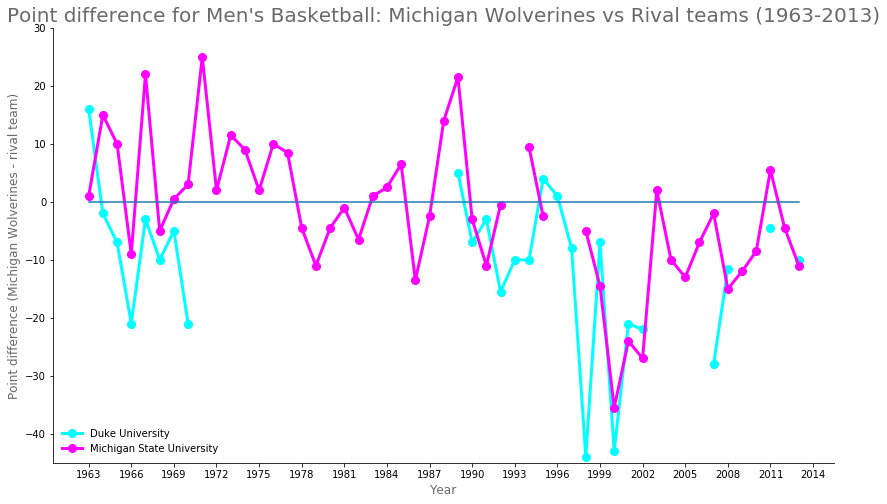

In [6]:
plt.figure(figsize=(14,8))
x_axis_range = pd.Series(np.arange(1963,2014,1))
duke_color_arr = []
msu_color_arr = []        
plt.plot(x_axis_range,umich_duke_grouped_merged['Goal difference'], '-o', color = 'cyan', linewidth = 3, markersize = 8)        
plt.plot(x_axis_range,umich_msu_grouped_merged['Goal difference'], '-o',color = 'magenta',linewidth = 3, markersize = 8)
plt.plot(x_axis_range,np.zeros(x_axis_range.shape))
ax = plt.gca()
ax.legend(['Duke University','Michigan State University'], loc = 3, fontsize = '10', frameon = False)
plt.title('Point difference for Men\'s Basketball: Michigan Wolverines vs Rival teams (1963-2013)', color = 'dimgrey', size = 20)
plt.ylim(-45,30)
plt.xticks(np.arange(1963,2015,3))
plt.xlabel('Year', color = 'dimgrey',fontsize = 12)
plt.ylabel('Point difference (Michigan Wolverines - rival team)', color = 'dimgrey',fontsize = 12)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()


#### Inference
Michigan Wolverines have had a  high positive point difference with Michigan Spartans (Michigan State University team), although in recent two decades the point difference has been consitently moving towards a negative values, which indicates that Michigan Spartans have had a more successful stint in recent years. However since 2003, the point difference has started moving closer to zero, which implies that point difference has considerably reduced and Michigan Wolverines are probably headed towards victory again